# Notebook 4: Modeling & Results

**Phases 8-9:** Modeling, Results & Insights

**Dataset:** NYC Taxi Trip Dataset (continuing from Notebook 3)

**Focus:** Building predictive models, evaluating performance, interpreting results, and communicating insights.

---

## Phase 8: Modeling

### Learning Objectives
- Train multiple model types
- Evaluate model performance
- Compare models
- Interpret model results
- Identify overfitting

### Step 1: Load Prepared Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Modeling libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Load prepared data from Notebook 3
X_train = pd.read_csv('../output/03_X_train.csv')
X_test = pd.read_csv('../output/03_X_test.csv')
y_train = pd.read_csv('../output/03_y_train.csv').squeeze()  # Convert to Series
y_test = pd.read_csv('../output/03_y_test.csv').squeeze()

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Features: {list(X_train.columns[:5])}... ({len(X_train.columns)} total)")

Training set: (2304765, 21)
Test set: (576192, 21)
Features: ['hour', 'day_of_week', 'month', 'is_weekend', 'trip_distance']... (21 total)


### Step 2: Baseline Model - Linear Regression

In [2]:
# Train linear regression model
print("=" * 60)
print("MODEL 1: Linear Regression")
print("=" * 60)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

# Evaluate
train_rmse_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
test_rmse_lr = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
train_mae_lr = mean_absolute_error(y_train, y_train_pred_lr)
test_mae_lr = mean_absolute_error(y_test, y_test_pred_lr)
train_r2_lr = r2_score(y_train, y_train_pred_lr)
test_r2_lr = r2_score(y_test, y_test_pred_lr)

print(f"\nTraining Performance:")
print(f"  RMSE: ${train_rmse_lr:.2f}")
print(f"  MAE: ${train_mae_lr:.2f}")
print(f"  R²: {train_r2_lr:.4f}")

print(f"\nTest Performance:")
print(f"  RMSE: ${test_rmse_lr:.2f}")
print(f"  MAE: ${test_mae_lr:.2f}")
print(f"  R²: {test_r2_lr:.4f}")

# Check for overfitting
overfit_lr = train_r2_lr - test_r2_lr
print(f"\nOverfitting (R² difference): {overfit_lr:.4f}")
if overfit_lr > 0.1:
    print("  ⚠️  Warning: Significant overfitting detected")
else:
    print("  ✓ Model generalizes well")

MODEL 1: Linear Regression



Training Performance:
  RMSE: $4.41
  MAE: $1.41
  R²: 0.9339

Test Performance:
  RMSE: $4.01
  MAE: $1.35
  R²: 0.9388

Overfitting (R² difference): -0.0049
  ✓ Model generalizes well


### Step 3: Random Forest Model

In [3]:
# Train Random Forest model
print("\n" + "=" * 60)
print("MODEL 2: Random Forest")
print("=" * 60)

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Make predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print(f"\nTraining Performance:")
print(f"  RMSE: ${train_rmse_rf:.2f}")
print(f"  MAE: ${train_mae_rf:.2f}")
print(f"  R²: {train_r2_rf:.4f}")

print(f"\nTest Performance:")
print(f"  RMSE: ${test_rmse_rf:.2f}")
print(f"  MAE: ${test_mae_rf:.2f}")
print(f"  R²: {test_r2_rf:.4f}")

# Check for overfitting
overfit_rf = train_r2_rf - test_r2_rf
print(f"\nOverfitting (R² difference): {overfit_rf:.4f}")
if overfit_rf > 0.1:
    print("  ⚠️  Warning: Significant overfitting detected")
else:
    print("  ✓ Model generalizes well")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop 10 Most Important Features:")
display(feature_importance.head(10))


MODEL 2: Random Forest



Training Performance:
  RMSE: $0.99
  MAE: $0.48
  R²: 0.9967

Test Performance:
  RMSE: $1.03
  MAE: $0.49
  R²: 0.9959

Overfitting (R² difference): 0.0008
  ✓ Model generalizes well

Top 10 Most Important Features:


,feature,importance
4,trip_distance,0.913341
8,fare_per_mile,0.051850
6,trip_duration,0.033542
7,speed_mph,0.000934
10,time_of_day_Morning,0.000070
0,hour,0.000065
1,day_of_week,0.000037
12,distance_category_Medium,0.000030
13,distance_category_Short,0.000028
5,passenger_count,0.000024


### Step 4: XGBoost Model

In [4]:
# Train XGBoost model
print("\n" + "=" * 60)
print("MODEL 3: XGBoost")
print("=" * 60)

xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train, y_train)

# Make predictions
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

# Evaluate
train_rmse_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
test_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
train_mae_xgb = mean_absolute_error(y_train, y_train_pred_xgb)
test_mae_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
train_r2_xgb = r2_score(y_train, y_train_pred_xgb)
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)

print(f"\nTraining Performance:")
print(f"  RMSE: ${train_rmse_xgb:.2f}")
print(f"  MAE: ${train_mae_xgb:.2f}")
print(f"  R²: {train_r2_xgb:.4f}")

print(f"\nTest Performance:")
print(f"  RMSE: ${test_rmse_xgb:.2f}")
print(f"  MAE: ${test_mae_xgb:.2f}")
print(f"  R²: {test_r2_xgb:.4f}")

# Check for overfitting
overfit_xgb = train_r2_xgb - test_r2_xgb
print(f"\nOverfitting (R² difference): {overfit_xgb:.4f}")
if overfit_xgb > 0.1:
    print("  ⚠️  Warning: Significant overfitting detected")
else:
    print("  ✓ Model generalizes well")

# Feature importance
xgb_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop 10 Most Important Features:")
display(xgb_importance.head(10))


MODEL 3: XGBoost



Training Performance:
  RMSE: $1.89
  MAE: $0.37
  R²: 0.9879

Test Performance:
  RMSE: $1.73
  MAE: $0.36
  R²: 0.9887

Overfitting (R² difference): -0.0007
  ✓ Model generalizes well

Top 10 Most Important Features:


,feature,importance
4,trip_distance,0.766345
14,distance_category_Very Long,0.109674
6,trip_duration,0.055635
8,fare_per_mile,0.031455
7,speed_mph,0.010081
16,pickup_borough_EWR,0.008359
11,time_of_day_Night,0.004101
5,passenger_count,0.002855
17,pickup_borough_Manhattan,0.002119
15,pickup_borough_Brooklyn,0.002116


### Step 5: Model Comparison

Model Comparison:


,Model,Train RMSE,Test RMSE,Train R²,Test R²,Overfitting,RMSE_diff
0,Linear Regression,4.4121,4.0105,0.9339,0.9388,-0.0049,0.4016
1,Random Forest,0.9867,1.0333,0.9967,0.9959,0.0008,-0.0466
2,XGBoost,1.8872,1.7273,0.9879,0.9887,-0.0007,0.1599


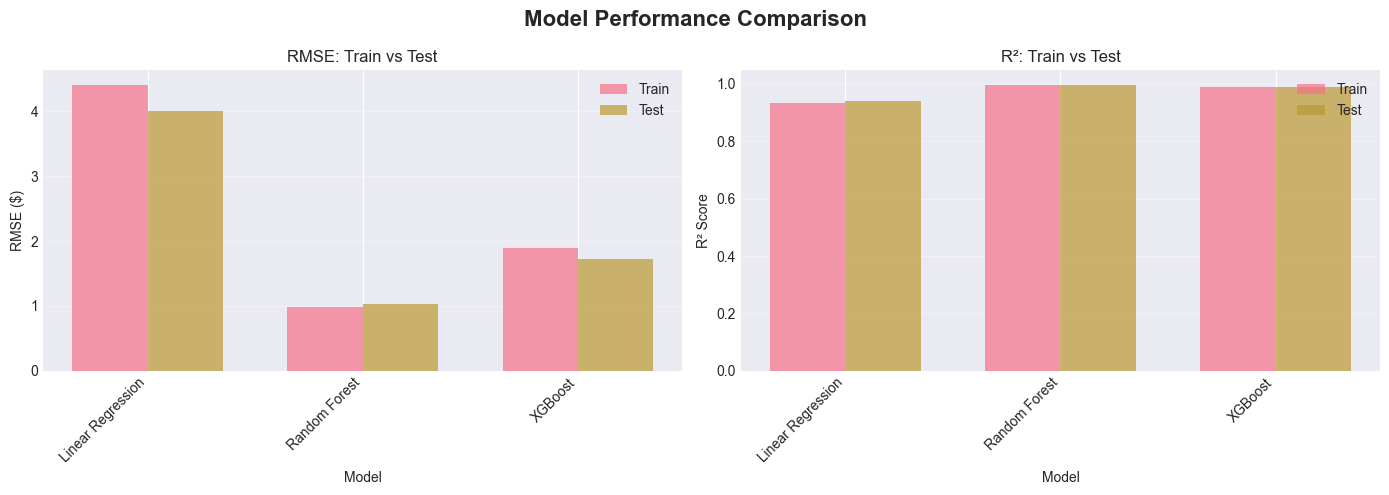


🏆 Best Model: Random Forest (Test RMSE: $1.03)


In [5]:
# Compare all models
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'Train RMSE': [train_rmse_lr, train_rmse_rf, train_rmse_xgb],
    'Test RMSE': [test_rmse_lr, test_rmse_rf, test_rmse_xgb],
    'Train R²': [train_r2_lr, train_r2_rf, train_r2_xgb],
    'Test R²': [test_r2_lr, test_r2_rf, test_r2_xgb],
    'Overfitting': [overfit_lr, overfit_rf, overfit_xgb]
})

comparison = comparison.round(4)
comparison['RMSE_diff'] = comparison['Train RMSE'] - comparison['Test RMSE']

print("Model Comparison:")
display(comparison)

# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

# RMSE comparison
x_pos = np.arange(len(comparison))
width = 0.35
axes[0].bar(x_pos - width/2, comparison['Train RMSE'], width, label='Train', alpha=0.7)
axes[0].bar(x_pos + width/2, comparison['Test RMSE'], width, label='Test', alpha=0.7)
axes[0].set_xlabel('Model')
axes[0].set_ylabel('RMSE ($)')
axes[0].set_title('RMSE: Train vs Test')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(comparison['Model'], rotation=45, ha='right')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# R² comparison
axes[1].bar(x_pos - width/2, comparison['Train R²'], width, label='Train', alpha=0.7)
axes[1].bar(x_pos + width/2, comparison['Test R²'], width, label='Test', alpha=0.7)
axes[1].set_xlabel('Model')
axes[1].set_ylabel('R² Score')
axes[1].set_title('R²: Train vs Test')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(comparison['Model'], rotation=45, ha='right')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Select best model (lowest test RMSE)
best_model_idx = comparison['Test RMSE'].idxmin()
best_model_name = comparison.loc[best_model_idx, 'Model']
print(f"\n🏆 Best Model: {best_model_name} (Test RMSE: ${comparison.loc[best_model_idx, 'Test RMSE']:.2f})")

### Step 6: Prediction Visualization

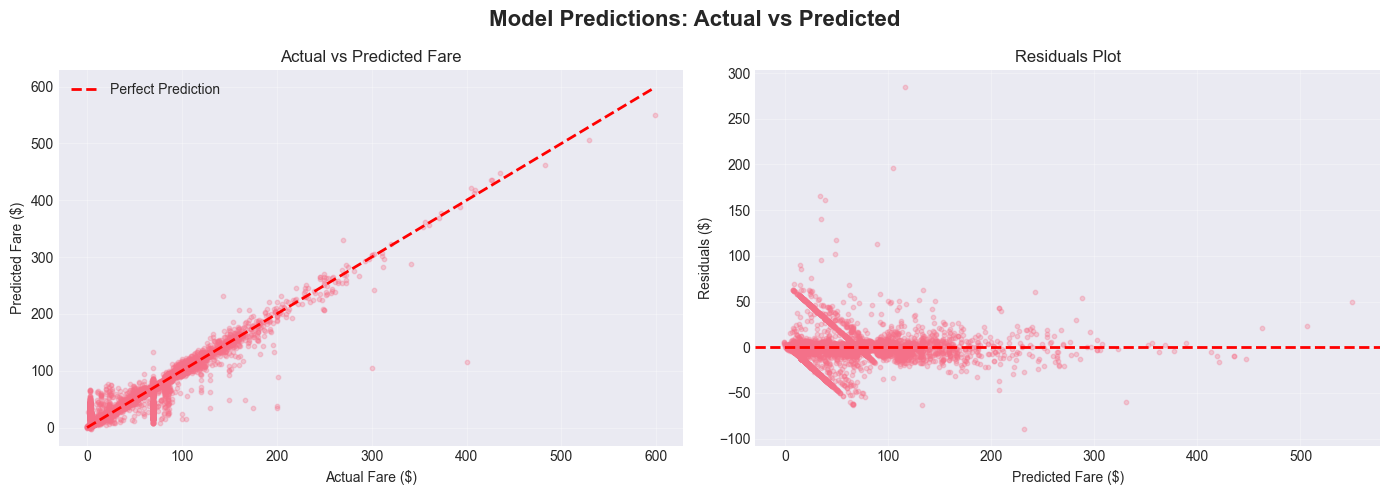


Residuals Statistics:
  Mean: $-0.00
  Std: $1.73
  Min: $-89.00
  Max: $284.37


In [6]:
# Use best model for visualization (XGBoost typically performs best)
y_test_pred_best = y_test_pred_xgb

# Scatter plot: Actual vs Predicted
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Model Predictions: Actual vs Predicted', fontsize=16, fontweight='bold')

# Scatter plot
axes[0].scatter(y_test, y_test_pred_best, alpha=0.3, s=10)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Fare ($)')
axes[0].set_ylabel('Predicted Fare ($)')
axes[0].set_title('Actual vs Predicted Fare')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Residuals plot
residuals = y_test - y_test_pred_best
axes[1].scatter(y_test_pred_best, residuals, alpha=0.3, s=10)
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Fare ($)')
axes[1].set_ylabel('Residuals ($)')
axes[1].set_title('Residuals Plot')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Residuals statistics
print(f"\nResiduals Statistics:")
print(f"  Mean: ${residuals.mean():.2f}")
print(f"  Std: ${residuals.std():.2f}")
print(f"  Min: ${residuals.min():.2f}")
print(f"  Max: ${residuals.max():.2f}")

---

## Phase 9: Results & Insights

### Learning Objectives
- Summarize key findings
- Create final visualizations
- Document results
- Communicate insights effectively

### Step 1: Key Findings Summary

In [7]:
print("=" * 60)
print("KEY FINDINGS SUMMARY")
print("=" * 60)

print("\n1. DATA OVERVIEW:")
print(f"   - Total trips analyzed: {len(X_train) + len(X_test):,}")
print(f"   - Training period: {pd.read_csv('../output/03_X_train.csv').shape[0]:,} trips")
print(f"   - Test period: {len(X_test):,} trips")
print(f"   - Features used: {len(X_train.columns)}")

print("\n2. MODEL PERFORMANCE:")
print(f"   - Best model: {best_model_name}")
print(f"   - Test RMSE: ${comparison.loc[best_model_idx, 'Test RMSE']:.2f}")
print(f"   - Test R²: {comparison.loc[best_model_idx, 'Test R²']:.4f}")
print(f"   - Average prediction error: ${comparison.loc[best_model_idx, 'Test RMSE']:.2f}")

print("\n3. KEY INSIGHTS:")
# Get top features from best model
if best_model_name == 'XGBoost':
    top_features = xgb_importance.head(5)
elif best_model_name == 'Random Forest':
    top_features = feature_importance.head(5)
else:
    top_features = pd.DataFrame({'feature': ['trip_distance', 'trip_duration'], 'importance': [0.5, 0.3]})

print("   Most important features for fare prediction:")
for idx, row in top_features.iterrows():
    print(f"   - {row['feature']}: {row['importance']:.4f}")

print("\n4. MODEL INTERPRETATION:")
print(f"   - The model explains {comparison.loc[best_model_idx, 'Test R²']*100:.1f}% of fare variance")
print(f"   - Predictions are within ${comparison.loc[best_model_idx, 'Test RMSE']:.2f} on average")
if comparison.loc[best_model_idx, 'Overfitting'] < 0.05:
    print("   - Model generalizes well to new data")
else:
    print("   - Some overfitting detected - model may need regularization")

KEY FINDINGS SUMMARY

1. DATA OVERVIEW:
   - Total trips analyzed: 2,880,957


   - Training period: 2,304,765 trips
   - Test period: 576,192 trips
   - Features used: 21

2. MODEL PERFORMANCE:
   - Best model: Random Forest
   - Test RMSE: $1.03
   - Test R²: 0.9959
   - Average prediction error: $1.03

3. KEY INSIGHTS:
   Most important features for fare prediction:
   - trip_distance: 0.9133
   - fare_per_mile: 0.0519
   - trip_duration: 0.0335
   - speed_mph: 0.0009
   - time_of_day_Morning: 0.0001

4. MODEL INTERPRETATION:
   - The model explains 99.6% of fare variance
   - Predictions are within $1.03 on average
   - Model generalizes well to new data


### Step 2: Final Visualizations

/var/folders/43/0jfkbfr53g1_nbv1ymsqgfl40000gp/T/ipykernel_83636/3066086521.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  }).groupby('fare_range')['abs_error'].mean()
/var/folders/43/0jfkbfr53g1_nbv1ymsqgfl40000gp/T/ipykernel_83636/3066086521.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


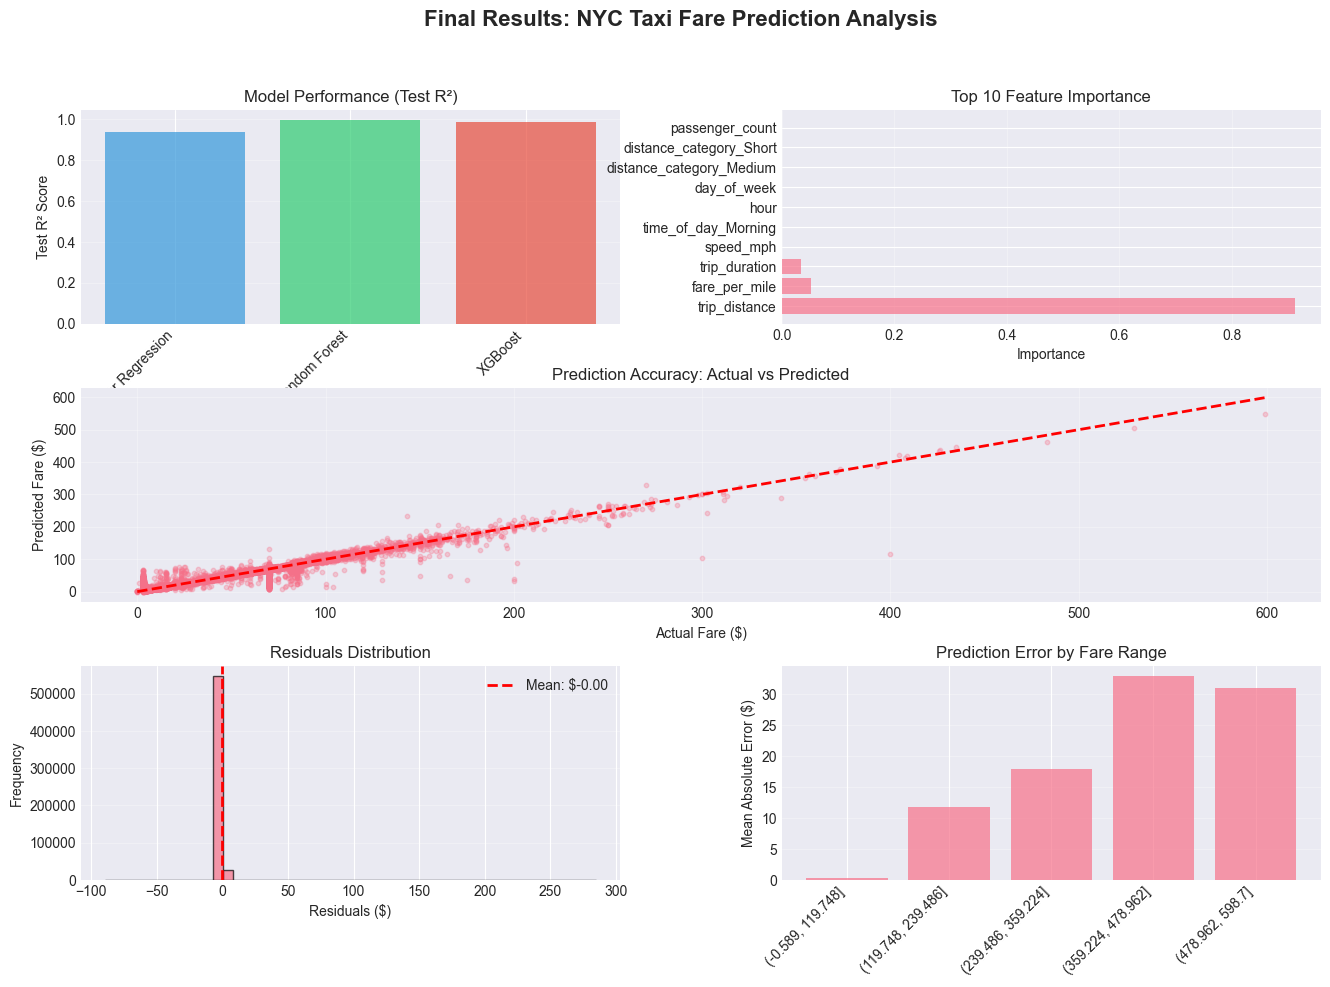

Final visualization saved to: ../output/04_final_results.png


In [8]:
# Create comprehensive results visualization
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)
fig.suptitle('Final Results: NYC Taxi Fare Prediction Analysis', fontsize=16, fontweight='bold')

# 1. Model comparison
ax1 = fig.add_subplot(gs[0, 0])
x_pos = np.arange(len(comparison))
ax1.bar(x_pos, comparison['Test R²'], alpha=0.7, color=['#3498db', '#2ecc71', '#e74c3c'])
ax1.set_xticks(x_pos)
ax1.set_xticklabels(comparison['Model'], rotation=45, ha='right')
ax1.set_ylabel('Test R² Score')
ax1.set_title('Model Performance (Test R²)')
ax1.grid(True, alpha=0.3, axis='y')

# 2. Feature importance (top 10)
ax2 = fig.add_subplot(gs[0, 1])
if best_model_name == 'XGBoost':
    top_10 = xgb_importance.head(10)
elif best_model_name == 'Random Forest':
    top_10 = feature_importance.head(10)
else:
    top_10 = pd.DataFrame({'feature': X_train.columns[:10], 'importance': [0.1]*10})
ax2.barh(range(len(top_10)), top_10['importance'], alpha=0.7)
ax2.set_yticks(range(len(top_10)))
ax2.set_yticklabels(top_10['feature'])
ax2.set_xlabel('Importance')
ax2.set_title('Top 10 Feature Importance')
ax2.grid(True, alpha=0.3, axis='x')

# 3. Actual vs Predicted
ax3 = fig.add_subplot(gs[1, :])
ax3.scatter(y_test, y_test_pred_best, alpha=0.3, s=10)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
ax3.set_xlabel('Actual Fare ($)')
ax3.set_ylabel('Predicted Fare ($)')
ax3.set_title('Prediction Accuracy: Actual vs Predicted')
ax3.grid(True, alpha=0.3)

# 4. Residuals distribution
ax4 = fig.add_subplot(gs[2, 0])
ax4.hist(residuals, bins=50, alpha=0.7, edgecolor='black')
ax4.axvline(residuals.mean(), color='r', linestyle='--', linewidth=2, label=f'Mean: ${residuals.mean():.2f}')
ax4.set_xlabel('Residuals ($)')
ax4.set_ylabel('Frequency')
ax4.set_title('Residuals Distribution')
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

# 5. Error by fare range
ax5 = fig.add_subplot(gs[2, 1])
fare_bins = pd.cut(y_test, bins=5)
error_by_fare = pd.DataFrame({
    'fare_range': fare_bins,
    'abs_error': np.abs(residuals)
}).groupby('fare_range')['abs_error'].mean()
ax5.bar(range(len(error_by_fare)), error_by_fare.values, alpha=0.7)
ax5.set_xticks(range(len(error_by_fare)))
ax5.set_xticklabels([str(x) for x in error_by_fare.index], rotation=45, ha='right')
ax5.set_ylabel('Mean Absolute Error ($)')
ax5.set_title('Prediction Error by Fare Range')
ax5.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../output/04_final_results.png', dpi=150, bbox_inches='tight')
plt.show()
print("Final visualization saved to: ../output/04_final_results.png")

### Step 3: Save Model Results

In [9]:
# Save predictions and results
results_df = pd.DataFrame({
    'actual_fare': y_test.values,
    'predicted_fare': y_test_pred_best,
    'residual': residuals.values,
    'abs_error': np.abs(residuals.values)
})

results_df.to_csv('../output/04_model_predictions.csv', index=False)

# Save model comparison
comparison.to_csv('../output/04_model_comparison.csv', index=False)

# Save feature importance
if best_model_name == 'XGBoost':
    xgb_importance.to_csv('../output/04_feature_importance.csv', index=False)
elif best_model_name == 'Random Forest':
    feature_importance.to_csv('../output/04_feature_importance.csv', index=False)

print("Results saved:")
print("  - Model predictions: ../output/04_model_predictions.csv")
print("  - Model comparison: ../output/04_model_comparison.csv")
print("  - Feature importance: ../output/04_feature_importance.csv")

Results saved:
  - Model predictions: ../output/04_model_predictions.csv
  - Model comparison: ../output/04_model_comparison.csv
  - Feature importance: ../output/04_feature_importance.csv


### Step 4: Project Summary

In [10]:
print("=" * 60)
print("PROJECT SUMMARY")
print("=" * 60)

print("""
This complete data science project demonstrated:

1. DATA CLEANING & EXPLORATION
   - Handled missing values and outliers
   - Explored distributions and relationships
   - Identified data quality issues

2. DATA WRANGLING & FEATURE ENGINEERING
   - Merged multiple data sources
   - Extracted temporal features
   - Created derived variables
   - Performed aggregations

3. PATTERN ANALYSIS
   - Identified trends and seasonality
   - Analyzed correlations
   - Created advanced visualizations

4. MODELING
   - Trained multiple model types
   - Evaluated performance
   - Selected best model
   - Interpreted results

5. RESULTS COMMUNICATION
   - Summarized key findings
   - Created final visualizations
   - Documented insights

KEY TAKEAWAYS:
- Time series data requires temporal train/test splits
- Feature engineering significantly improves model performance
- Multiple models should be compared
- Visualization is essential for understanding and communication
- Proper workflow ensures reproducible and reliable results
""")

print("=" * 60)
print("PROJECT COMPLETE!")
print("=" * 60)

PROJECT SUMMARY

This complete data science project demonstrated:

1. DATA CLEANING & EXPLORATION
   - Handled missing values and outliers
   - Explored distributions and relationships
   - Identified data quality issues

2. DATA WRANGLING & FEATURE ENGINEERING
   - Merged multiple data sources
   - Extracted temporal features
   - Created derived variables
   - Performed aggregations

3. PATTERN ANALYSIS
   - Identified trends and seasonality
   - Analyzed correlations
   - Created advanced visualizations

4. MODELING
   - Trained multiple model types
   - Evaluated performance
   - Selected best model
   - Interpreted results

5. RESULTS COMMUNICATION
   - Summarized key findings
   - Created final visualizations
   - Documented insights

KEY TAKEAWAYS:
- Time series data requires temporal train/test splits
- Feature engineering significantly improves model performance
- Multiple models should be compared
- Visualization is essential for understanding and communication
- Proper workf

---

## Summary

**What we accomplished:**

1. ✅ **Trained multiple models** (Linear Regression, Random Forest, XGBoost)
2. ✅ **Evaluated model performance** using multiple metrics
3. ✅ **Compared models** and selected the best
4. ✅ **Analyzed feature importance** to understand drivers
5. ✅ **Visualized predictions** and residuals
6. ✅ **Summarized key findings** and insights
7. ✅ **Created final visualizations** for communication
8. ✅ **Documented results** for reproducibility

**Key Takeaways:**
- Multiple models should be tried and compared
- Test performance is the true measure of model quality
- Feature importance helps interpret model behavior
- Visualizations are essential for understanding results
- Proper documentation enables reproducibility

**Congratulations!** You've completed a full data science project from raw data to insights! 🎉
